In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.signal import argrelextrema

In [2]:
data = yf.download('BTC-USD', start='2023-01-01', end='2023-03-31', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [4]:
# for local maxima
maxims = argrelextrema(data['Open'].values, np.greater)

# for local minima
mins = argrelextrema(data['Open'].values, np.less)

In [5]:
max_data = list(maxims[0])
min_data = list(mins[0])

coeff = 0.001

if max_data[0] < min_data[0]:
    max_data = max_data[1::]
if min_data[-1] > max_data[-1]:
    min_data = min_data[:-1]
res_max = []
res_min = []
for i in range(len(max_data)):
    bp = data.iloc[min_data[i]]['Open']
    sp = data.iloc[max_data[i]]['Open']
    if (sp - bp) - coeff * (bp + sp) > 0:
        res_max.append(max_data[i])
        res_min.append(min_data[i])

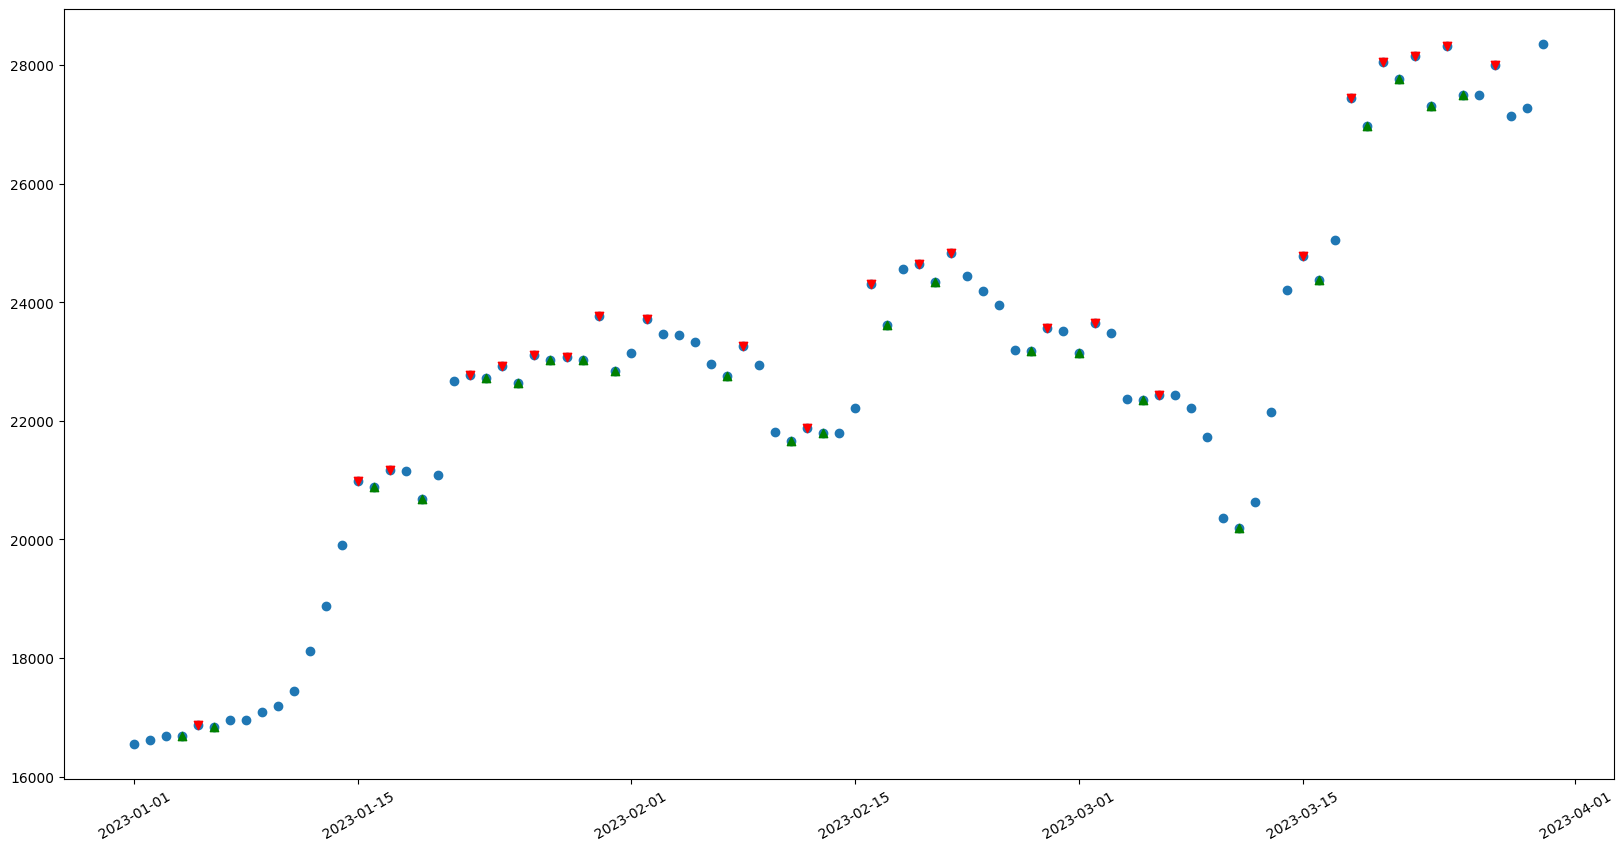

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(data.index, data['Open'])
plt.xticks(rotation=30)
plt.scatter(data.iloc[res_min].index, data.iloc[min_data]['Open'], color = 'green', marker = '^')
plt.scatter(data.iloc[res_max].index, data.iloc[max_data]['Open'], color = 'red', marker = 'v')

In [9]:
classes = []

for i in range(len(data)):
    if i in res_min:
        classes.append(1)
    elif i in res_max:
        classes.append(0)
    else:
        classes.append(2)

In [10]:
data['class'] = classes

In [12]:
data['class'].value_counts()

class
2    43
1    23
0    23
Name: count, dtype: int64

In [14]:
data.to_csv('1st_quater_2023_BTC.csv', index=False)